In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import pandas_datareader.data as web

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL', 'GOOG', 'MFST', 'AMZN', 'INTC']

In [6]:
end=datetime.now()
start=datetime(end.year-1, end.month, end.day)

In [7]:
for stock in tech_list:
    globals()[stock]=web.DataReader(stock, 'yahoo', start, end)

In [8]:
GOOG.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,757.799683,762.841063,752.707898,758.059526,1.626492e+06,758.059526
std,38.352499,37.818342,38.623122,38.173835,7.067256e+05,38.173835
min,671.000000,672.299988,663.283997,668.260010,5.860000e+05,668.260010
25%,724.010010,728.570007,720.280029,725.270020,1.201400e+06,725.270020
50%,767.000000,771.020020,759.799988,766.609985,1.461000e+06,766.609985
75%,783.750000,789.750000,780.570007,785.309998,1.828400e+06,785.309998
max,837.809998,841.950012,828.640015,835.669983,5.951900e+06,835.669983


In [9]:
INTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2016-02-25 to 2017-02-24
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


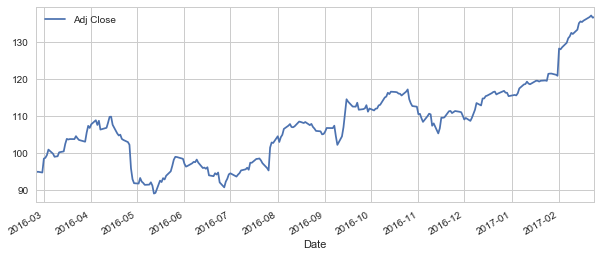

In [10]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

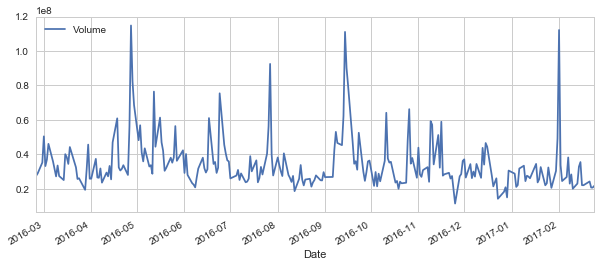

In [11]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [12]:
ma_day=[10, 20, 50]
for ma in ma_day:
    column_name='MA for %s days' %(str(ma))
    
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=ma, center=False).mean()

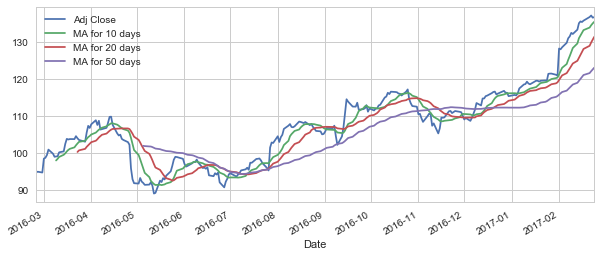

In [13]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

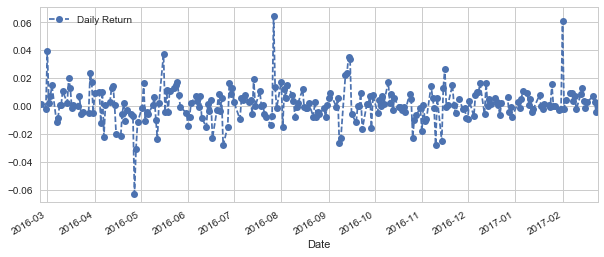

In [15]:
AAPL['Daily Return'].plot(legend=True, figsize=(10,4), linestyle='--', marker='o')

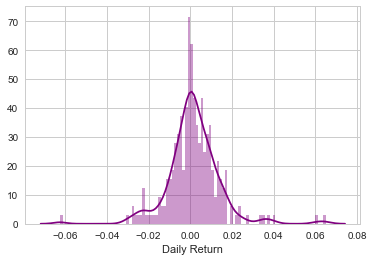

In [16]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

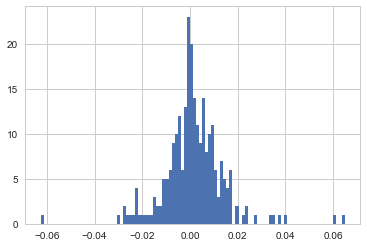

In [17]:
#can also do hist in pandas but don't get kde
AAPL['Daily Return'].hist(bins=100)

In [18]:
closing_df=web.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [19]:
closing_df.head()

,AAPL,AMZN,GOOG,INTC,MFST
Date,,,,,
2016-02-25,94.756818,555.150024,705.750000,28.721360,0.0153
2016-02-26,94.903715,555.229980,705.070007,28.895897,0.0140
2016-02-29,94.688268,552.520020,697.770020,28.692269,0.0140
2016-03-01,98.448766,579.039978,718.809998,29.448605,0.0105
2016-03-02,98.664213,580.210022,718.849976,29.613448,0.0115


In [20]:
tech_returns = closing_df.pct_change()

In [21]:
tech_returns.head()

,AAPL,AMZN,GOOG,INTC,MFST
Date,,,,,
2016-02-25,NaN,NaN,NaN,NaN,NaN
2016-02-26,0.001550,0.000144,-0.000964,0.006077,-0.084967
2016-02-29,-0.002270,-0.004881,-0.010354,-0.007047,0.000000
2016-03-01,0.039715,0.047998,0.030153,0.026360,-0.250000
2016-03-02,0.002188,0.002021,0.000056,0.005598,0.095238


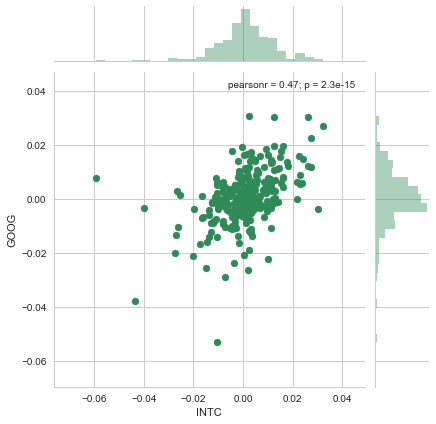

In [22]:
sns.jointplot('INTC', 'GOOG', data=tech_returns, kind='scatter', color='seagreen')

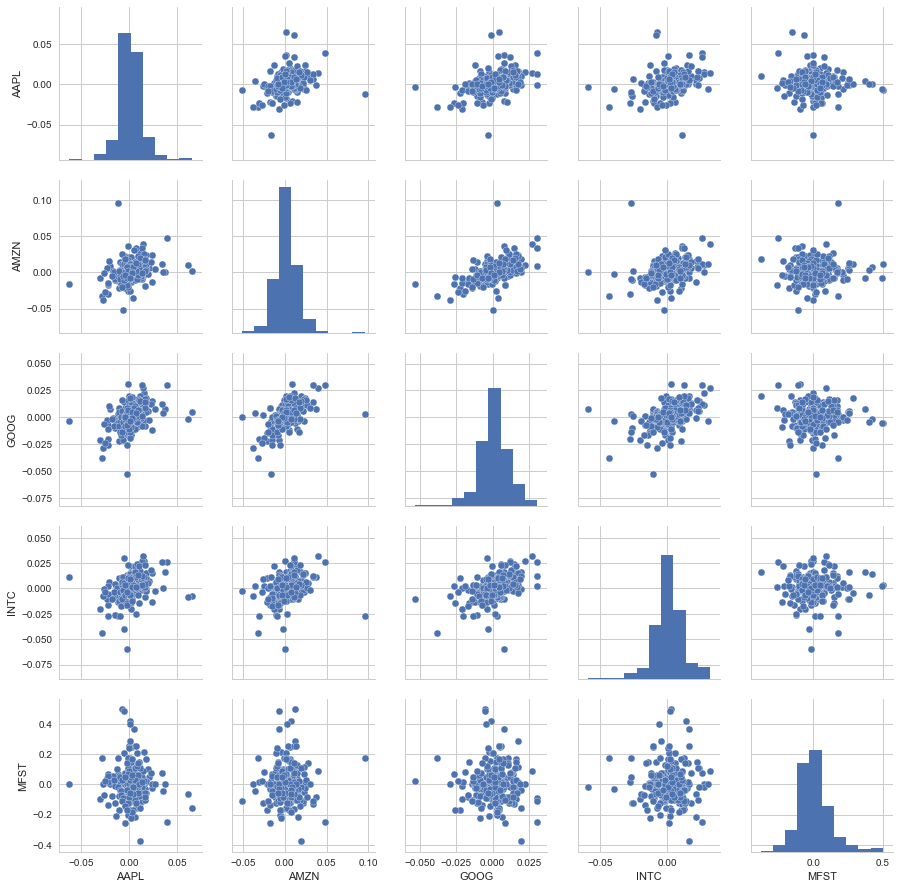

In [23]:
sns.pairplot(data=tech_returns.dropna())

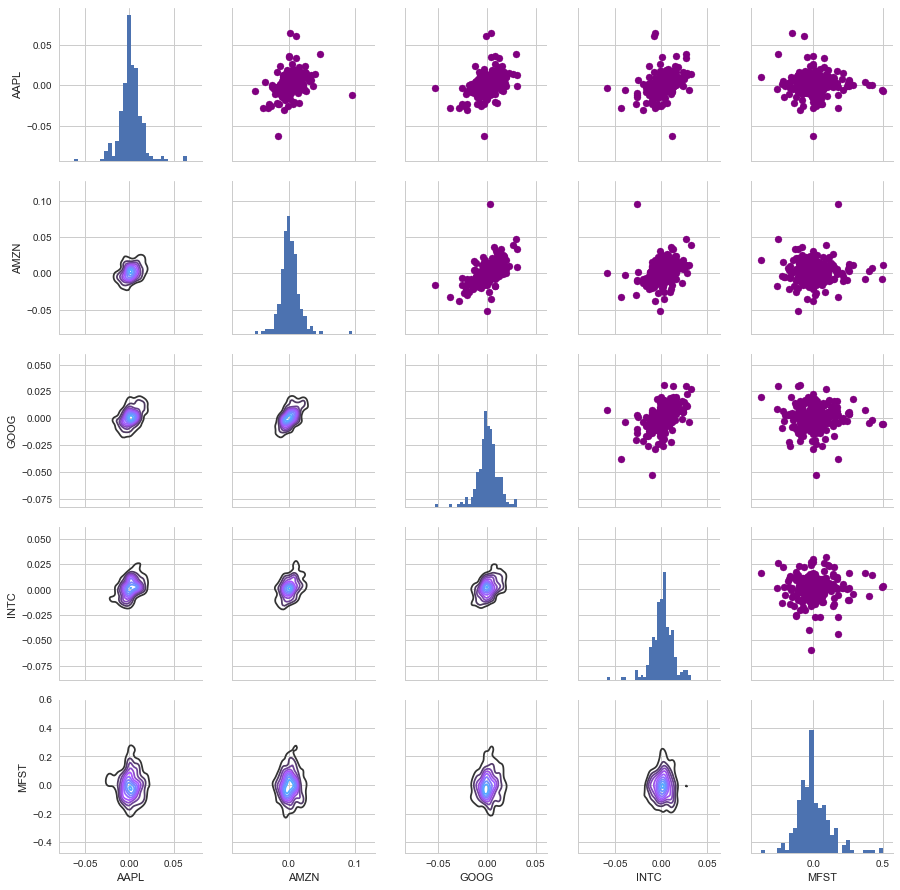

In [24]:
returns_fig = sns.PairGrid(data=tech_returns.dropna())

returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

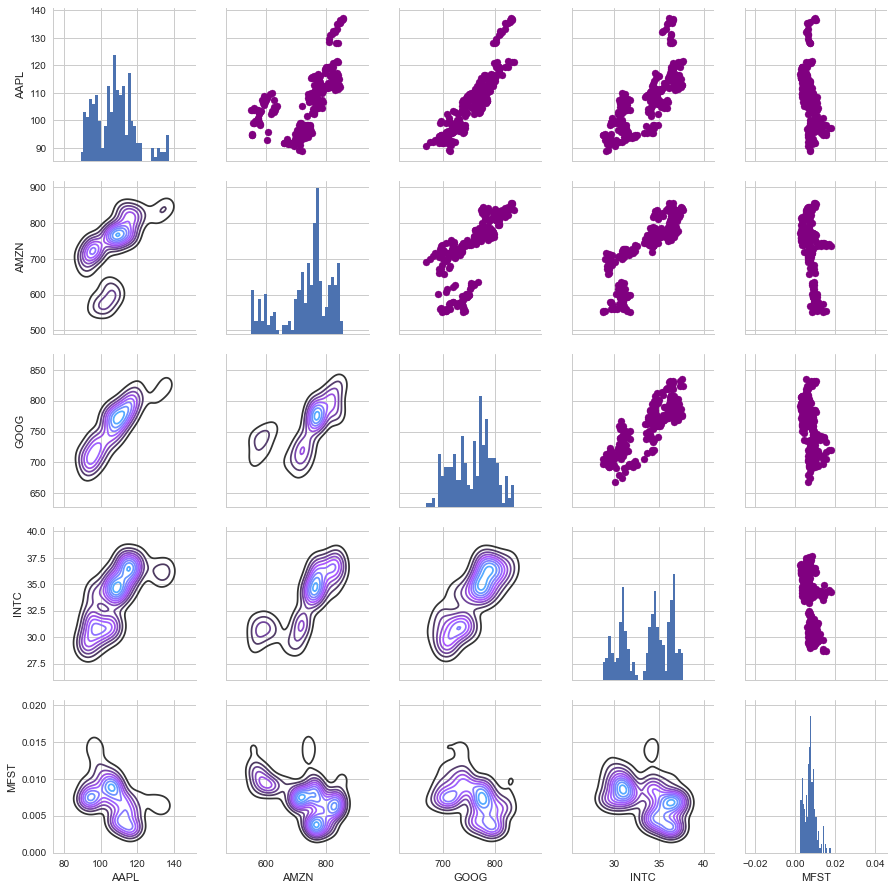

In [25]:
returns_fig = sns.PairGrid(data=closing_df)

returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

# Corrplots have been deprecated. Need to figure out how to do this with a heatmap.

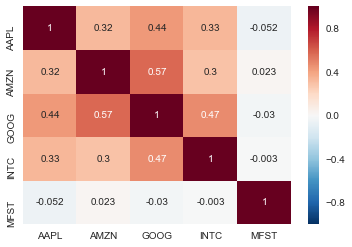

In [26]:
#sns.corrplot(tech_returns.dropna(), annot=True) - doesn't work anymore.
sns.heatmap(tech_returns.dropna().corr(), annot=True)

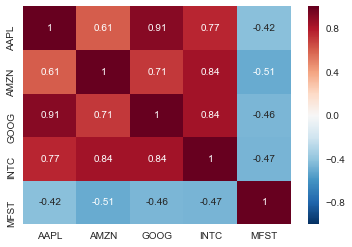

In [27]:
sns.heatmap(closing_df.dropna().corr(), annot=True)

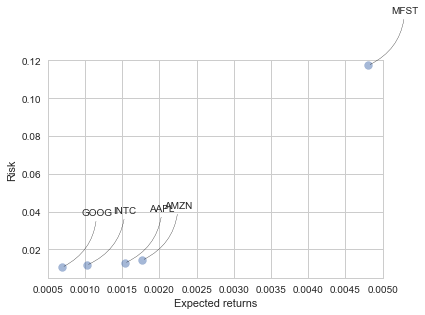

In [42]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.005,0.12])
plt.xlim([0.0005,0.005])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

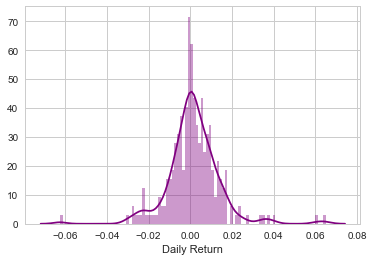

In [45]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [46]:
rets.head()

,AAPL,AMZN,GOOG,INTC,MFST
Date,,,,,
2016-02-26,0.001550,0.000144,-0.000964,0.006077,-0.084967
2016-02-29,-0.002270,-0.004881,-0.010354,-0.007047,0.000000
2016-03-01,0.039715,0.047998,0.030153,0.026360,-0.250000
2016-03-02,0.002188,0.002021,0.000056,0.005598,0.095238
2016-03-03,0.007444,-0.004688,-0.008945,0.001310,0.000000


In [50]:
#95% of time returns will be above this level. this represents money at risk
rets['AAPL'].quantile(0.05)

-0.018962552989303643

# Monte Carlo Methods

In [55]:
days=365
dt=1/days
mu=rets.mean()['INTC']
sigma=rets.std()['INTC']

In [57]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [53]:
INTC.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-02-25,29.320000,29.620001,28.950001,29.620001,17571400,28.721360
2016-02-26,29.879999,30.080000,29.700001,29.799999,19902200,28.895897
2016-02-29,29.719999,30.139999,29.580000,29.590000,22903100,28.692269
2016-03-01,29.930000,30.530001,29.750000,30.370001,25502600,29.448605
2016-03-02,30.299999,30.870001,30.120001,30.540001,23779800,29.613448


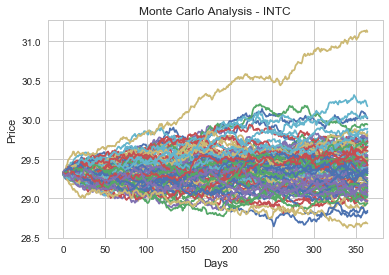

In [58]:
start_price=29.32
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis - INTC')

In [59]:
runs=10000
simulations=np.zeros(runs)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price, days, mu, sigma)[days-1]

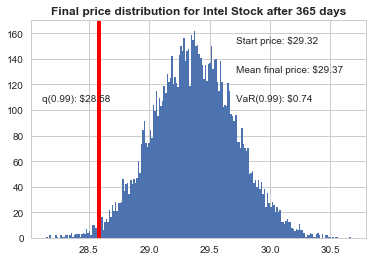

In [62]:
q=np.percentile(simulations, 1)
plt.hist(simulations, bins=200)
# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Intel Stock after %s days" % days, weight='bold');